# Import all DVH, calc mean DVH

In [1]:
import os
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEclipseDVH import eclipse_DVH
from scipy import interpolate

In [2]:
files = os.listdir()   # return a list of files
AAA_files = [file for file in files if file.endswith('AAA.txt')]
AXB_files = [file for file in files if file.endswith('AXB.txt')]

In [13]:
# d = {value: foo(value) for value in sequence if bar(value)}
AAA_dict = {file.strip('.txt'): eclipse_DVH(file) for file in AAA_files}    # load all AAA DVH into dict
AXB_dict = {file.strip('.txt'): eclipse_DVH(file) for file in AXB_files}    # load all AAA DVH into dict

Case11_AAA.txt loaded 	 patID = Case11_AAA	 Prescription [Gy] = 55.000
Case12_AAA.txt loaded 	 patID = Case12_AAA	 Prescription [Gy] = 55.000
case13_AAA.txt loaded 	 patID = Case13_AAA	 Prescription [Gy] = 55.000
case14_AAA.txt loaded 	 patID = Case14_AAA	 Prescription [Gy] = 55.000
Case16_AAA.txt loaded 	 patID = Case16_AAA	 Prescription [Gy] = 55.000
Case17_AAA.txt loaded 	 patID = Case17_AAA	 Prescription [Gy] = 55.000
Case1_AAA.txt loaded 	 patID = Case1_AAA	 Prescription [Gy] = 55.000
Case22_AAA.txt loaded 	 patID = Case22_AAA	 Prescription [Gy] = 55.000
Case24_AAA.txt loaded 	 patID = Case24_AAA	 Prescription [Gy] = 55.000
Case5_AAA.txt loaded 	 patID = Case5_AAA	 Prescription [Gy] = 55.000
Case11_AXB.txt loaded 	 patID = Case11_AXB	 Prescription [Gy] = 55.000
Case12_AXB.txt loaded 	 patID = Case12_AXB_Dm	 Prescription [Gy] = 55.000
Case13_AXB.txt loaded 	 patID = Case13_AXB	 Prescription [Gy] = 55.000
Case14_AXB.txt loaded 	 patID = Case14_AXB	 Prescription [Gy] = 55.000
Case16_

In [15]:
AXB_dict.keys()

dict_keys(['Case22_AXB', 'Case5_AXB', 'Case11_AXB', 'Case14_AXB', 'Case24_AXB', 'Case1_AXB', 'Case12_AXB', 'Case17_AXB', 'Case16_AXB', 'Case13_AXB'])

In [17]:
AXB_dict.get('Case22_AXB').DVH_df.columns  # get a single DVH structures

Index(['BODY', 'Foramen+3mm', 'L Brachial plex', 'Oesophagus', 'Heart',
       'Trachea', 'Airway avoidance', 'PTV CHEST', 'Lt_Lung', 'Foramen',
       'PTV ring 2-3cm', 'Rt_Lung', 'Bronchial tree', 'Both Lungs-ITV', 'skin',
       'PseudoPTV-ITV', 'ITV', 'Pseudo Ring', 'ribs', 'R Brachial plex',
       'Artefact', 'temp', 'Liver', 'Dose 50[%]', 'Dose 100[%]'],
      dtype='object')

In [47]:
#AXB_dict.get('Case22_AXB').DVH_df['PTV CHEST'].plot(label = 'Case22_AXB' )
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

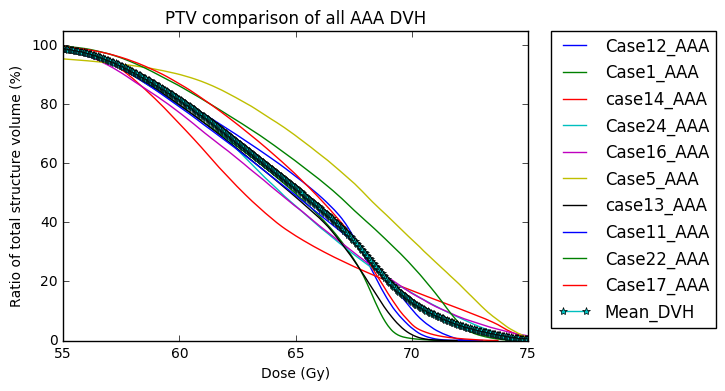

In [48]:
for i, key in enumerate(AAA_dict.keys()):
    temp_DVH = AAA_dict.get(key).DVH_df['PTV CHEST']
    temp_DVH_df = pd.DataFrame({key : temp_DVH})
    if i == 0:
        df = temp_DVH_df  # create the dataframe
    else:       
        df = pd.concat([df, temp_DVH_df], axis=1)
    
    df = df.fillna(value=0)
    temp_DVH.plot(label = key)   # plot raw spectra

df.mean(axis = 1).plot(marker = '*', label = 'Mean_DVH')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0,105])
plt.xlim([55,75])
plt.title('PTV comparison of all AAA DVH')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')

#df.tail()

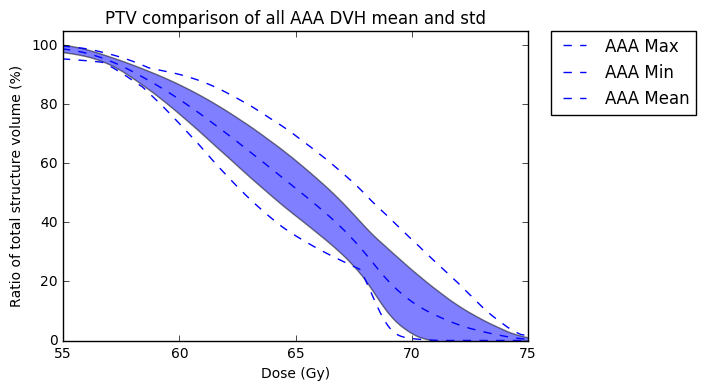

In [8]:
for i, key in enumerate(AAA_dict.keys()):
    temp_AAA_DVH = AAA_dict.get(key).DVH_df['PTV CHEST']   # get the DVH data
    temp_AAA_DVH_df = pd.DataFrame({key : temp_AAA_DVH})       # place in a df
    if i == 0:
        AAA_df = temp_AAA_DVH_df  # create the dataframe
    else:       
        AAA_df = pd.concat([AAA_df, temp_AAA_DVH_df], axis=1)   # if df exists, populate
    
    AAA_df = AAA_df.fillna(value=0)

plt.fill_between(AAA_df.mean(axis = 1).index.values, (AAA_df.mean(axis = 1) - AAA_df.std(axis = 1)).values, (AAA_df.mean(axis = 1) + AAA_df.std(axis = 1)).values, alpha=0.5)
plt.plot(AAA_df.max(axis = 1), ls = '--', c = 'b', label = 'AAA Max')
plt.plot(AAA_df.min(axis = 1), ls = '--', c = 'b', label = 'AAA Min')
plt.plot(AAA_df.mean(axis = 1), ls = '--', c = 'b', label = 'AAA Mean')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0,105])
plt.xlim([55,75])
plt.title('PTV comparison of all AAA DVH mean and std')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')

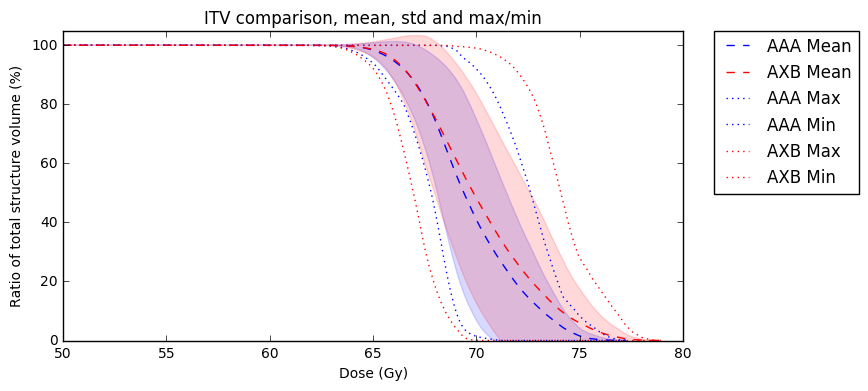

In [50]:
width=8
height=4
plt.figure(figsize=(width, height))

#structure = 'PTV CHEST'
structure = 'ITV'
# structure = 'skin'  # not data for every plan therefore throws exception
for i, key in enumerate(AAA_dict.keys()):
    temp_AAA_DVH = AAA_dict.get(key).DVH_df[structure]   # get the DVH data
    temp_AAA_DVH_df = pd.DataFrame({key : temp_AAA_DVH})       # place in a df

    if i == 0:
        AAA_df = temp_AAA_DVH_df  # create the dataframe
    else:       
        AAA_df = pd.concat([AAA_df, temp_AAA_DVH_df], axis=1)   # if df exists, populate    
    AAA_df = AAA_df.fillna(value=0)
       
for i, key in enumerate(AXB_dict.keys()):
    temp_AXB_DVH = AXB_dict.get(key).DVH_df[structure]   # get the DVH data
    temp_AXB_DVH_df = pd.DataFrame({key : temp_AXB_DVH})       # place in a df
    
    if i == 0:
        AXB_df = temp_AXB_DVH_df  # create the dataframe
    else:       
        AXB_df = pd.concat([AXB_df, temp_AXB_DVH_df], axis=1)   # if df exists, populate
    AXB_df = AXB_df.fillna(value=0)
    
plt.fill_between(AAA_df.mean(axis = 1).index.values, (AAA_df.mean(axis = 1) - AAA_df.std(axis = 1)).values, (AAA_df.mean(axis = 1) + AAA_df.std(axis = 1)).values, color = 'b', alpha=0.15)
plt.plot(AAA_df.mean(axis = 1), ls = '--', color = 'b', label = 'AAA Mean')

plt.fill_between(AXB_df.mean(axis = 1).index.values, (AXB_df.mean(axis = 1) - AXB_df.std(axis = 1)).values, (AXB_df.mean(axis = 1) + AXB_df.std(axis = 1)).values, color = 'r', alpha=0.15)
plt.plot(AXB_df.mean(axis = 1), ls = '--', color = 'r', label = 'AXB Mean')

if True:  # plot the extrem max and min?
    plt.plot(AAA_df.max(axis = 1), ls = 'dotted', color = 'b', label = 'AAA Max')
    plt.plot(AAA_df.min(axis = 1), ls = 'dotted', color = 'b', label = 'AAA Min')
    plt.plot(AXB_df.max(axis = 1), ls = 'dotted', color = 'r', label = 'AXB Max')
    plt.plot(AXB_df.min(axis = 1), ls = 'dotted', color = 'r', label = 'AXB Min')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0,105])
plt.xlim([50,80])
plt.title(structure + ' comparison, mean, std and max/min')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')

In [20]:
?plt.fill_between